## Análise do arquivo 201301.csv sem ter passado pelo neo4j

In [1]:
#Imports
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()

In [2]:
#Reading file
df = pd.read_csv('/home/marcos/Desktop/dados/clean_data/201301.csv')

In [3]:
df.head()

,MES_REFERENCIA,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO,NOME_FAVORECIDO,VALOR_PARCELA
0,201301,201202,DF,9701,BRASILIA,16686120759,VALNI ESTEVES DE AZEVEDO,102
1,201301,201203,DF,9701,BRASILIA,16686120759,VALNI ESTEVES DE AZEVEDO,102
2,201301,201204,DF,9701,BRASILIA,16686120759,VALNI ESTEVES DE AZEVEDO,102
3,201301,201205,DF,9701,BRASILIA,16686120759,VALNI ESTEVES DE AZEVEDO,102
4,201301,201206,DF,9701,BRASILIA,21259030271,ANA PAULA PEREIRA DA SILVA,64


In [4]:
#Remover a coluna MES_REFERENCIA pois é um valor fixo 201301 a coluna NOME_FAVORECIDO
#e NOME_MUNICIPIO pois vamos trabalhar apenas com o nis e codigo do municipiocomo forma 
#de identificação  e por fim a coluna VALOR_PARCELA por não ter utilidade "nesse momento".
del df['MES_REFERENCIA']
del df['NOME_FAVORECIDO']
#del df['NOME_MUNICIPIO']
del df['VALOR_PARCELA']

In [5]:
df.head()

,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO
0,201202,DF,9701,BRASILIA,16686120759
1,201203,DF,9701,BRASILIA,16686120759
2,201204,DF,9701,BRASILIA,16686120759
3,201205,DF,9701,BRASILIA,16686120759
4,201206,DF,9701,BRASILIA,21259030271


In [6]:
#Observar a quantidade de linhas e colunas no dataframe
df.shape

(203340, 5)

In [7]:
df['NIS'] = df['NIS_FAVORECIDO'] / 10000000000

In [8]:
df.head()

,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO,NIS
0,201202,DF,9701,BRASILIA,16686120759,1.668612
1,201203,DF,9701,BRASILIA,16686120759,1.668612
2,201204,DF,9701,BRASILIA,16686120759,1.668612
3,201205,DF,9701,BRASILIA,16686120759,1.668612
4,201206,DF,9701,BRASILIA,21259030271,2.125903


In [9]:
df.dtypes

MES_COMPETENCIA             int64
UF                         object
CODIGO_MUNICIPIO_SIAFI      int64
NOME_MUNICIPIO             object
NIS_FAVORECIDO              int64
NIS                       float64
dtype: object

## Algumas visualizações

In [10]:
#Agora com a coluna NIS posso remover a col NIS_FAVORECIDO
del df['NIS_FAVORECIDO']

In [11]:
df.head()

,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS
0,201202,DF,9701,BRASILIA,1.668612
1,201203,DF,9701,BRASILIA,1.668612
2,201204,DF,9701,BRASILIA,1.668612
3,201205,DF,9701,BRASILIA,1.668612
4,201206,DF,9701,BRASILIA,2.125903


In [12]:
#df.plot(kind='bar',grid=True,figsize=(8,4), logy=True)
#plt.show()

In [13]:
#Verificar quantas pessoas recebeu em cada estado referente ao mês de Janeiro de 2013
df['UF'].value_counts()

GO    98891
DF    95107
MG     9342
Name: UF, dtype: int64

In [14]:
#Criando um dataframe simples para visualizar esses dados
df2 = pd.DataFrame({
    'UF':['GO','DF','MG'],
    'NIS':[98891,95107,9342],
},columns=['UF','NIS'])
df2.head()

,UF,NIS
0,GO,98891
1,DF,95107
2,MG,9342


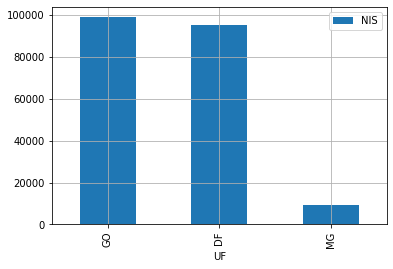

In [15]:
#Observando o gráfico de barras desse novo dataframe

df2.plot(kind='bar',x='UF',y='NIS', grid=True)


In [16]:
df2.iplot(kind='scatter',x='UF',y='NIS', title='Scatter', color='red',mode='markers')

In [17]:
df2['UF1'] = [1,2,3]

In [18]:
# Change data type of column 'Marks' from int64 to float64
df2['UF1'] = df2['UF1'].astype('float64')
df2['NIS'] = df2['NIS'].astype('float64')
df2.head()

,UF,NIS,UF1
0,GO,98891.0,1.0
1,DF,95107.0,2.0
2,MG,9342.0,3.0


### Os números 1,2 e 3 no eixo x representa respectivamente os estados GO, DF e MG

In [19]:
#Gráfico de bolha
df2.iplot(kind='bubble', x='UF1',y='NIS', size='NIS', colors='blue', title='Qtd de beneficiário por estado em 2013-01')

In [20]:
df3 = pd.read_csv('/home/marcos/Desktop/dados/clean_data/201302.csv', low_memory=False)

In [21]:
df3.head()

,MES_REFERENCIA,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO,NOME_FAVORECIDO,VALOR_PARCELA
0,201302,201203,DF,9701,BRASILIA,21251407309,DANIELA SANTOS DA SILVA FERREIRA,166
1,201302,201203,DF,9701,BRASILIA,12605240276,ELZITA DIAS DOS REIS,70
2,201302,201203,DF,9701,BRASILIA,16326815291,FRANCYELE FATIMA DE SOUSA,230
3,201302,201203,DF,9701,BRASILIA,12939391272,MARIA BEATRIZ DE SOUSA BARBOSA PINTO,134
4,201302,201203,DF,9701,BRASILIA,16440124162,MERILENE ALVES DA SILVA,166


In [22]:
del df3['MES_REFERENCIA']
del df3['NOME_FAVORECIDO']
del df3['NOME_MUNICIPIO']
del df3['VALOR_PARCELA']

In [24]:
df3.head()

,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NIS_FAVORECIDO
0,201203,DF,9701,21251407309
1,201203,DF,9701,12605240276
2,201203,DF,9701,16326815291
3,201203,DF,9701,12939391272
4,201203,DF,9701,16440124162


In [25]:
#df3['NIS'] = df3['NIS_FAVORECIDO'] / 10000000000
#del df3['NIS_FAVORECIDO']


In [26]:
df3.head()

,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NIS_FAVORECIDO
0,201203,DF,9701,21251407309
1,201203,DF,9701,12605240276
2,201203,DF,9701,16326815291
3,201203,DF,9701,12939391272
4,201203,DF,9701,16440124162


In [27]:
df3['UF'].value_counts()

GO    110129
DF     91640
MG      9118
UF        34
Name: UF, dtype: int64

In [28]:
#Criando um dataframe simples para visualizar esses dados
df3 = pd.DataFrame({
    'UF':['GO','DF','MG'],
    'NIS':[110129,91640,34],
},columns=['UF','NIS'])
df3

,UF,NIS
0,GO,110129
1,DF,91640
2,MG,34


In [29]:
df3['UF1'] = [1,2,3]

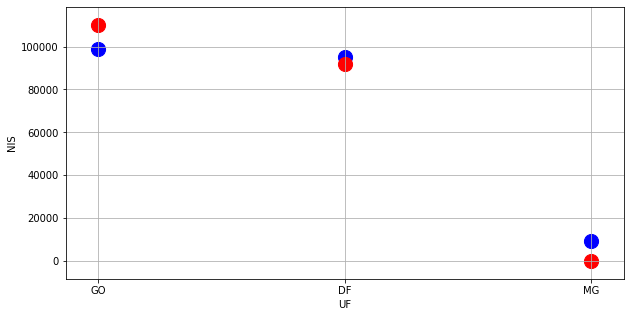

In [75]:
ax1 = df2.plot.scatter(x='UF',y='NIS',c='blue',grid=True,s=200,figsize=(10,5))
df3.plot.scatter(ax=ax1,x='UF',y='NIS',c='red',grid=True,s=200,figsize=(10,5))
plt.show()

In [68]:
df2.iplot(kind='bubble', x='UF1',y='NIS', size='NIS', colors='blue', title='Qtd de beneficiário por estado em 2013-01')
df3.iplot(kind='bubble', x='UF1',y='NIS', size='NIS', colors='red', title='Qtd de beneficiário por estado em 2013-02')
